In [11]:
import LinAlg as LA
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import Debug
import random

In [12]:
# Function to generate random points within the box (1,1,1) to (2,2,2)
def generate_random_points(num_points: int):
    points = []
    for _ in range(num_points):
        x = random.uniform(0,200)
        y = random.uniform(0,200)
        z = random.uniform(0,200)
        points.append(LA.Vector(x, y, z))
    return points

# Generate 10 random points
random_points = generate_random_points(10)

# Print the generated points
for point in random_points:
    print(point)


theta = np.pi / 4  # 45 degrees rotation around Z-axis
phi = np.pi / 6    # 30 degrees rotation around Y-axis
translation = LA.Vector(random.uniform(0,2000), random.uniform(0,2000), random.uniform(0,2000))  # Translation vector

transformation_matrix = Debug.create_transformation_matrix(theta, phi, translation)
print(transformation_matrix)


Vector(192.50, 94.00, 83.57)
Vector(98.12, 119.67, 132.44)
Vector(67.79, 89.16, 116.78)
Vector(0.87, 46.66, 50.21)
Vector(107.61, 57.48, 175.23)
Vector(72.53, 82.28, 111.57)
Vector(64.44, 9.62, 143.64)
Vector(131.74, 104.42, 138.60)
Vector(118.68, 29.20, 64.44)
Vector(47.09, 70.04, 13.68)
[[   0.6124   -0.6124    0.5    1978.3534]
 [   0.7071    0.7071    0.     1486.3098]
 [  -0.3536    0.3536    0.866  1286.885 ]
 [   0.        0.        0.        1.    ]]


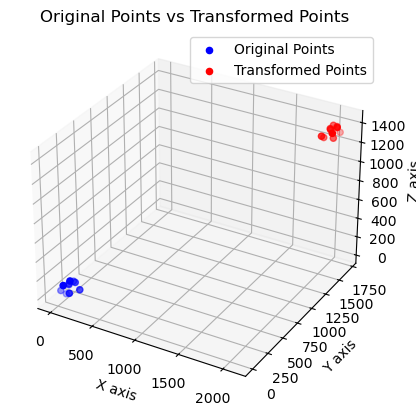

In [13]:
transformed_points = LA.transform_points(transformation_matrix, random_points)
Debug.plot_original_vs_transformed(random_points, transformed_points)

Find transformation from random_points to transformed_points

In [14]:
# Convert transformed_points and random_points to numpy arrays
transformed_points_np = Debug.vectors_to_numpy(transformed_points)
random_points_np = Debug.vectors_to_numpy(random_points)

# Call the function with correct inputs
R, t = LA.point_cloud_registration_least_squares(transformed_points_np, random_points_np)

print("Rotation matrix:", R)
print("Translation vector:", t, "\n")

print("Ground truth: \n", transformation_matrix)

Rotation matrix: [[ 6.12372801e-01 -6.12372361e-01  4.99999645e-01]
 [ 7.07106562e-01  7.07107000e-01 -8.56670282e-08]
 [-3.53553197e-01  3.53553082e-01  8.66025609e-01]]
Translation vector: [1978.35337288 1486.30983219 1286.88500679] 

Ground truth: 
 [[   0.6124   -0.6124    0.5    1978.3534]
 [   0.7071    0.7071    0.     1486.3098]
 [  -0.3536    0.3536    0.866  1286.885 ]
 [   0.        0.        0.        1.    ]]


Proposed point:  Vector(2080.46, 1688.89, 1324.44)
Proposed point:  Vector(2031.37, 1640.31, 1409.20)
Proposed point:  Vector(2023.65, 1597.29, 1395.57)
Proposed point:  Vector(1975.42, 1519.92, 1346.56)
Proposed point:  Vector(2096.67, 1603.05, 1420.92)
Proposed point:  Vector(2028.17, 1595.78, 1386.95)
Proposed point:  Vector(2083.74, 1538.68, 1391.90)
Proposed point:  Vector(2064.38, 1653.30, 1397.26)
Proposed point:  Vector(2065.37, 1590.88, 1311.06)
Proposed point:  Vector(1971.14, 1569.13, 1306.84)
Truth point:  Vector(2080.46, 1688.89, 1324.44)
Truth point:  Vector(2031.37, 1640.31, 1409.20)
Truth point:  Vector(2023.65, 1597.29, 1395.57)
Truth point:  Vector(1975.42, 1519.92, 1346.56)
Truth point:  Vector(2096.67, 1603.05, 1420.92)
Truth point:  Vector(2028.17, 1595.78, 1386.95)
Truth point:  Vector(2083.74, 1538.68, 1391.90)
Truth point:  Vector(2064.38, 1653.30, 1397.26)
Truth point:  Vector(2065.37, 1590.88, 1311.06)
Truth point:  Vector(1971.14, 1569.13, 1306.84)


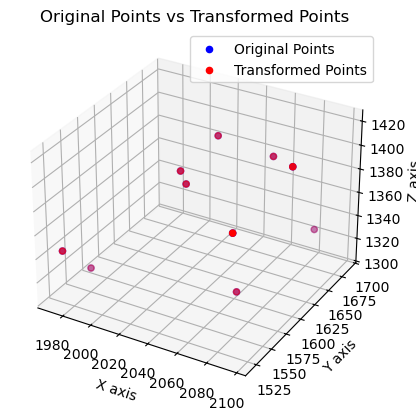

In [15]:
Proposed_transformation_matrix = LA.Frame(R, t)
Proposed_transformed_points = LA.transform_points(Proposed_transformation_matrix, random_points)

for point in Proposed_transformed_points:
    print("Proposed point: " ,point)

for point in transformed_points:
    print("Truth point: ", point)


Debug.plot_original_vs_transformed(transformed_points, Proposed_transformed_points)  